In [5]:
import matplotlib.pyplot as plt

In [6]:
config = open('config.txt','r',encoding='utf8').readlines()

title = ''
dim = ['' for i in range(2)]
rg = ['' for i in range(3)]
describe = [['' for i in range(3)] for j in range(2)]
imgurl = [['' for i in range(3)] for j in range(3)]
dif = [['' for i in range(4)] for j in range(4)]

for i,v in enumerate(config):
    content = v.strip()
    if content == '标题':
        title = config[i+1]
    elif content == '维度':
        dim = config[i+1].strip().split()
    elif content == '分类':
        rg = config[i+1].strip().split()
    elif content == '维度描述':
        for j,v in enumerate(config[i+1].strip().split()):
            describe[0][j] = v
        for j,v in enumerate(config[i+1].strip().split()): 
            describe[1][j] = v
    elif content == '图片名':
        for j,v in enumerate(config[i+1].strip().split()):
            imgurl[0][j] = v
        for j,v in enumerate(config[i+2].strip().split()):
            imgurl[1][j] = v
        for j,v in enumerate(config[i+3].strip().split()): 
            imgurl[2][j] = v
    elif content == '图片描述':
        for j,v in enumerate(config[i+1].strip().split()): 
            dif[1][j+1] = v
        for j,v in enumerate(config[i+2].strip().split()): 
            dif[2][j+1] = v
        for j,v in enumerate(config[i+3].strip().split()):
            dif[3][j+1] = v


In [8]:
img = [[None]*4,[None]*4,[None]*4,[None]*4]

img[0][0] = title + '\n' + "九宫格"
for i in range(3):
    img[0][i+1] = dim[0]+rg[i]+'\n\n'+describe[0][i]
  
for i in range(3):
    img[i+1][0] = dim[1]+rg[i]+'\n\n'+describe[1][i]


plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False



<Figure size 720x720 with 0 Axes>

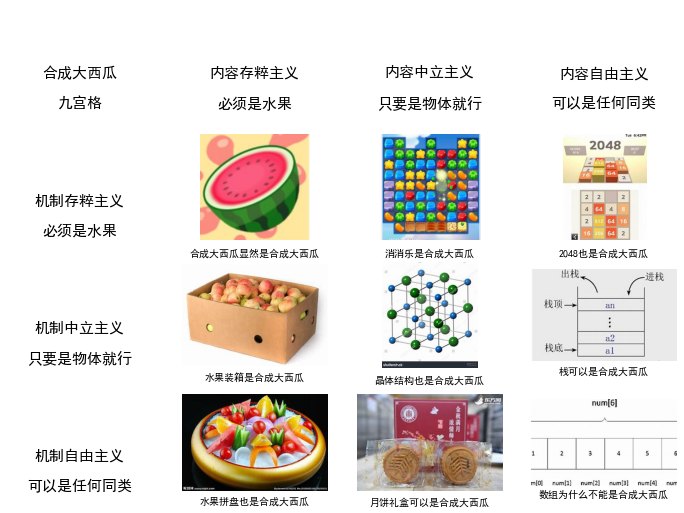

In [7]:

plt.figure(figsize=(10,10))
plt.subplots(4,4,figsize=(12,9))
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        
        if img[i][j] is not None:
            plt.title(img[i][j],y=-0.01,fontsize=15)
        else:
            plt.title(dif[i][j],y=-0.2,fontsize=10)
            plt.imshow(plt.imread(imgurl[i-1][j-1]))
        plt.axis('off')

In [5]:
img

[['合成大西瓜\n\n九宫格', '内容存粹主义\n必须是水果', '内容中立主义\n只要是物体就行', '内容自由主义\n可以是任何同类'],
 ['机制存粹主义\n必须是水果', None, None, None],
 ['机制中立主义\n只要是物体就行', None, None, None],
 ['机制自由主义\n可以是任何同类', None, None, None]]

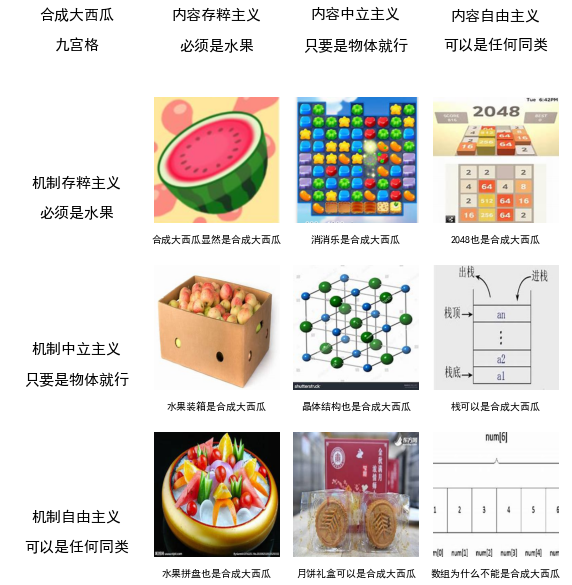

In [30]:
from PIL import Image

plt.figure(figsize=(10,10))
grid = plt.GridSpec(7, 8)
for i in range(4):
    for j in range(4):
            
        if img[i][j] is not None:
            plt.subplot(grid[i*2:i*2+1,j*2:j*2+2])
            plt.title(img[i][j],y=-0.01,fontsize=15)
        else:
            plt.subplot(grid[i*2-1:i*2+1,j*2:j*2+2])
            
            plt.title(dif[i][j],y=-0.2,fontsize=10)
            plt.imshow(Image.open(imgurl[i-1][j-1]).resize((250,250)))
        plt.axis('off')
        

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=1)


In [53]:
import os
from PIL import Image,ImageFont,ImageDraw

im = Image.new("RGB", (700, 700), (255, 255, 255))
dr = ImageDraw.Draw(im)
font = ImageFont.truetype(os.path.join("fonts", "msyh.ttf"), 14)

dr.text((5,5),img[0][0],font=font, fill="#000000")
for i in range(3):
    dr.text((120+i*200,5),img[i+1][0],font=font, fill="#000000")
    dr.text((5,100+i*200),img[0][i+1],font=font, fill="#000000")
    dr.line([(110+i*200,0),(110+i*200,700)],fill=256)
    dr.line([(0,50+i*200),(700,50+i*200)],fill=256)

for i in range(3):
    for j in range(3):
        im.paste(Image.open(imgurl[i][j]).resize((128,128)),(120+i*200,100+j*200))
        dr.text((120+i*200,228+j*200),dif[i+1][j+1],font=font, fill="#000000")
im.show()